<a href="https://colab.research.google.com/github/XENOXI/Iishenka/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle
!cp kaggle.json ~/.kaggle/
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset

cp: cannot stat 'kaggle.json': No such file or directory


Saving kaggle.json to kaggle.json
100% 1.08G/1.08G [01:04<00:00, 20.0MB/s]
100% 1.08G/1.08G [01:04<00:00, 18.1MB/s]


In [2]:
!unzip the-simpsons-characters-dataset.zip
!rm -rf the-simpsons-characters-dataset.zip 
!rm -rf simpsons_dataset/simpsons_dataset

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1281.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1282.jpg  
  inflating: simpsons_dataset/simpsons_datas

In [ ]:
!nvidia-smi

Mon Mar 20 16:06:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0    32W /  70W |   4633MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
torch.cuda.is_available()

True

In [3]:
#kaggle pars


import shutil
import os



!rm -rf testset
os.mkdir("testset")
test_data_name = os.listdir("kaggle_simpson_testset/kaggle_simpson_testset")
for i in range(len(test_data_name)):
  name = test_data_name[i]
  dst = "testset/"+ name[:name.rfind('_')]
  path = "kaggle_simpson_testset/kaggle_simpson_testset/"+name

  if not os.path.exists(dst):
    os.mkdir(dst)
  shutil.copyfile(path, dst+"/"+name)
  

content = os.listdir('simpsons_dataset')
content.sort()

for i in content:
    dst = "testset/"+i
    src = "simpsons_dataset/"+i
    file_name = os.listdir(src)[0]
    src =src +  "/" + os.listdir(src)[0]
    
    print(src)
    if not os.path.exists(dst):
      os.mkdir(dst)
      dst = dst + "/" + file_name
      shutil.copyfile(src,dst)




simpsons_dataset/abraham_grampa_simpson/pic_0586.jpg
simpsons_dataset/agnes_skinner/pic_0031.jpg
simpsons_dataset/apu_nahasapeemapetilon/pic_0586.jpg
simpsons_dataset/barney_gumble/pic_0075.jpg
simpsons_dataset/bart_simpson/pic_0586.jpg
simpsons_dataset/carl_carlson/pic_0075.jpg
simpsons_dataset/charles_montgomery_burns/pic_0586.jpg
simpsons_dataset/chief_wiggum/pic_0586.jpg
simpsons_dataset/cletus_spuckler/pic_0031.jpg
simpsons_dataset/comic_book_guy/pic_0243.jpg
simpsons_dataset/disco_stu/pic_0005.jpg
simpsons_dataset/edna_krabappel/pic_0243.jpg
simpsons_dataset/fat_tony/pic_0005.jpg
simpsons_dataset/gil/pic_0005.jpg
simpsons_dataset/groundskeeper_willie/pic_0075.jpg
simpsons_dataset/homer_simpson/pic_0586.jpg
simpsons_dataset/kent_brockman/pic_0243.jpg
simpsons_dataset/krusty_the_clown/pic_0586.jpg
simpsons_dataset/lenny_leonard/pic_0243.jpg
simpsons_dataset/lionel_hutz/pic_0001.jpg
simpsons_dataset/lisa_simpson/pic_0586.jpg
simpsons_dataset/maggie_simpson/pic_0075.jpg
simpsons_data

In [18]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc1 = nn.Linear(64*124*124, 128)
        self.fc2 = nn.Linear(128, 42)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.relu(self.conv2(x))
        x = x.view(-1, 64 * 124 * 124)
        x = nn.functional.relu (self.fc1(x))
        x = self.fc2(x)
        return x



transform = transforms.Compose([transforms.Resize((128, 128)), transforms.ToTensor()])
data_set =  datasets.ImageFolder("simpsons_dataset", transform=transform)

valid_count = int(len(data_set)*0)
train_set, valid_set = random_split(data_set,[len(data_set)-valid_count,valid_count])
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 32, shuffle = True)
#validate_loader = torch.utils.data.DataLoader(valid_set, batch_size = 32, shuffle = True)

transform = transforms.Compose([transforms.Resize((128, 128)), transforms.ToTensor()])
test_set =  datasets.ImageFolder("testset", transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 32)



In [ ]:
model = Net().cuda()
model.load_state_dict(torch.load("/content/drive/MyDrive/myWeight"))

<All keys matched successfully>

In [19]:
model = Net().cuda()
criterion = nn.CrossEntropyLoss().cuda()


accuracy_per_epoch = []
recall_per_epoch = []
precision_per_epoch = []


running_loss_per_epoch = []
validation_loss_per_epoch = []
validation_accuracy =[]
validation_recall = []
validation_precision = []
for epoch in range(20):

    optimizer = torch.optim.SGD(model.parameters(), lr=0.02/(epoch+1), momentum=0,weight_decay=1e-04)

    running_loss = 0.0
    buff = 0
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i,data in enumerate(train_loader, 0):
        x, label = data
        x = x.cuda()
        label = label.cuda()
        optimizer.zero_grad()
        y = model(x)
        loss = criterion(y, label)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        real = sum(y.argmax(dim=1)==label).to('cpu').item()
        TP += real
        TN += 40*32+real
        FN += 32-real
        FP += 32-real

        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, (running_loss-buff) / 3200))
            buff = running_loss
    accuracy_per_epoch.append((TP+TN)/(TP+TN+FP+FN))
    running_loss_per_epoch.append(running_loss/32/len(train_loader))
    recall_per_epoch.append(TP/(TP+FN))
    precision_per_epoch.append(TP/(TP+FP))

    # validation
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    running_loss = 0.0
    for i,data in enumerate(test_loader, 0):
        x, label = data
        x = x.cuda()
        label = label.cuda()
        y = model(x)
        loss = criterion(y, label)
        running_loss += loss.item()
        real = sum(y.argmax(dim=1)==label).to('cpu').item()
        TP += real
        TN += 40*32+real
        FN += 32-real
        FP += 32-real

    validation_loss_per_epoch.append(running_loss/32/len(test_loader))
    validation_accuracy.append((TP+TN)/(TP+TN+FP+FN))
    validation_recall.append(TP/(TP+FN))
    validation_precision.append(TP/(TP+FP))



    

    


[1,   100] loss: 0.099
[1,   200] loss: 0.089
[1,   300] loss: 0.080
[1,   400] loss: 0.073
[1,   500] loss: 0.068
[1,   600] loss: 0.067
[2,   100] loss: 0.056
[2,   200] loss: 0.054
[2,   300] loss: 0.053
[2,   400] loss: 0.054
[2,   500] loss: 0.051
[2,   600] loss: 0.051
[3,   100] loss: 0.044
[3,   200] loss: 0.046
[3,   300] loss: 0.045
[3,   400] loss: 0.044
[3,   500] loss: 0.043
[3,   600] loss: 0.042
[4,   100] loss: 0.038
[4,   200] loss: 0.039
[4,   300] loss: 0.037
[4,   400] loss: 0.037
[4,   500] loss: 0.037
[4,   600] loss: 0.038
[5,   100] loss: 0.031
[5,   200] loss: 0.033
[5,   300] loss: 0.032
[5,   400] loss: 0.034
[5,   500] loss: 0.034
[5,   600] loss: 0.032
[6,   100] loss: 0.029
[6,   200] loss: 0.029
[6,   300] loss: 0.028
[6,   400] loss: 0.029
[6,   500] loss: 0.028
[6,   600] loss: 0.029
[7,   100] loss: 0.024
[7,   200] loss: 0.024
[7,   300] loss: 0.025
[7,   400] loss: 0.026
[7,   500] loss: 0.026
[7,   600] loss: 0.026
[8,   100] loss: 0.021
[8,   200] 

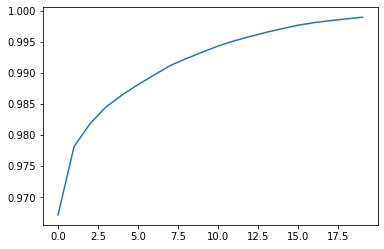

In [20]:
import matplotlib.pyplot as plt

plt.plot(accuracy_per_epoch)

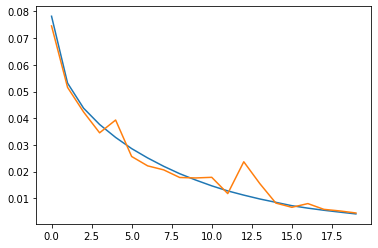

In [21]:
plt.plot(running_loss_per_epoch)
plt.plot(validation_loss_per_epoch)

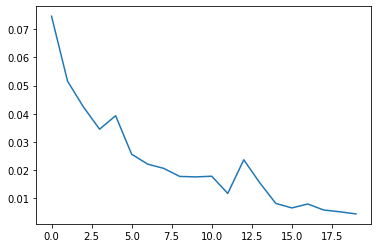

In [26]:
plt.plot(validation_loss_per_epoch)

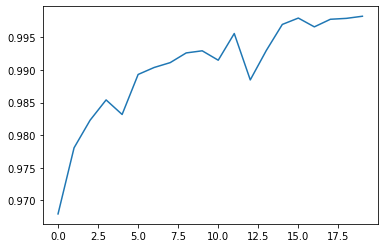

In [25]:
plt.plot(validation_accuracy)

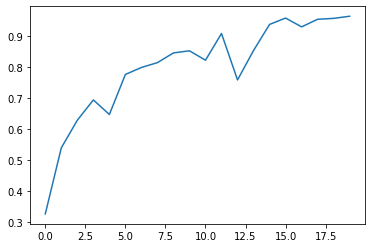

In [23]:
plt.plot(validation_recall)


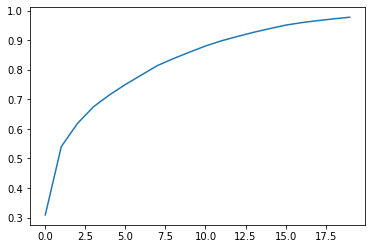

In [24]:
plt.plot(precision_per_epoch)

In [22]:
import numpy as np
import os




accuracy = np.zeros(42)
all = np.zeros(42)
running_loss = 0.0
for i,data in enumerate(test_loader, 0):
    x, label = data
    x = x.cuda()
    all[label]+=1
    label = label.cuda()
    y = model(x)
    loss = criterion(y, label)
    running_loss += loss.item()

    
    buff=label.to('cpu')[(y.argmax(dim=1)==label).to('cpu').numpy()]
    accuracy[buff] += 1

print(accuracy,all)
print(sum(accuracy)/sum(all))


[2. 1. 3. 1. 2. 1. 3. 2. 0. 3. 0. 2. 1. 1. 1. 2. 3. 2. 3. 1. 2. 0. 3. 1.
 3. 2. 1. 3. 2. 3. 1. 1. 2. 0. 1. 1. 1. 2. 1. 1. 0. 1.] [2. 1. 3. 1. 2. 1. 3. 2. 1. 3. 1. 2. 1. 1. 1. 2. 3. 2. 3. 1. 2. 1. 3. 1.
 3. 2. 1. 3. 2. 3. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1.]
0.9295774647887324


In [ ]:
arr = np.array([i for i in range(10)])
sec = [bool(i%2) for i in range(10)]
arr[sec]+=1

print(arr,sec)

[ 0  2  2  4  4  6  6  8  8 10] [False, True, False, True, False, True, False, True, False, True]


In [ ]:
model.summary()